In [ ]:
!pip install -q librosa soundfile matplotlib numpy tqdm


In [ ]:
# Path to your ZIP file inside Drive
zip_path = "/content/drive/MyDrive/irmas/archive.zip"

# Extract ZIP to a folder named "irmas"
extract_to = "/content/drive/MyDrive/irmas"

!unzip -q "$zip_path" -d "$extract_to"

print("Extraction completed.")


Extraction completed.


In [ ]:
import os

DATASET_FOLDER = "/content/drive/MyDrive/irmas/IRMAS-TrainingData"

print("Dataset Folder:", DATASET_FOLDER)
print("Exists:", os.path.exists(DATASET_FOLDER))


Dataset Folder: /content/drive/MyDrive/irmas/IRMAS-TrainingData
Exists: True


In [ ]:
audio_files = []

for root, _, files in os.walk(DATASET_FOLDER):
    for f in files:
        if f.lower().endswith(('.wav', '.mp3', '.flac', '.ogg')):
            audio_files.append(os.path.join(root, f))

print(f"Found {len(audio_files)} audio files\n")

# Show first 10
for p in audio_files[:10]:
    print(p)


Found 6705 audio files

/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__3.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/013__[cel][nod][cla]0025__1.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/014__[cel][nod][cla]0041__2.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/013__[cel][nod][cla]0025__2.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__2.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__1.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__2.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__3.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/014__[cel][nod][cla]0041__3.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__1.wav


In [ ]:
import librosa

sample_path = audio_files[0]
print("Loading:", sample_path)

audio, sr = librosa.load(sample_path, sr=None)  # load original sampling rate
print("Original sampling rate:", sr)
print("Original shape:", audio.shape)  # tells if stereo or mono


Loading: /content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__3.wav
Original sampling rate: 44100
Original shape: (132299,)


In [ ]:
import numpy as np

if len(audio.shape) == 2:  # stereo → mono
    print("Stereo detected → converting to mono")
    audio = np.mean(audio, axis=1)

print("Final audio shape:", audio.shape)


Final audio shape: (132299,)


In [ ]:
TARGET_SR = 16000
audio_16k = librosa.resample(audio, orig_sr=sr, target_sr=TARGET_SR)

print("Resampled to:", TARGET_SR)


Resampled to: 16000


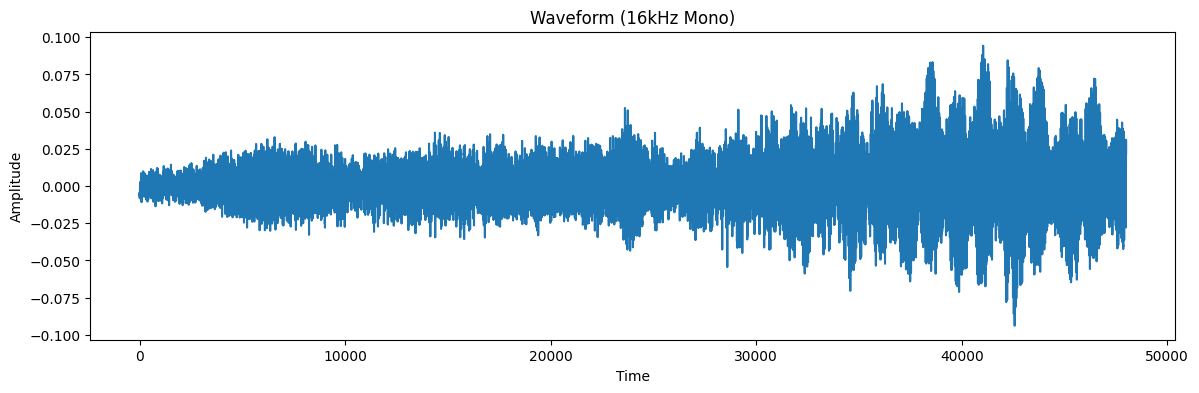

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(audio_16k)
plt.title("Waveform (16kHz Mono)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


day 2 tasks

In [ ]:
!pip install -q librosa matplotlib numpy

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

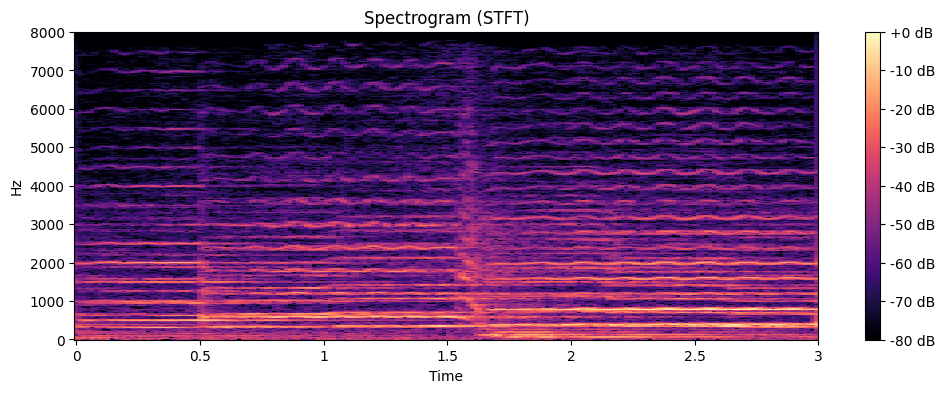

In [ ]:
# STFT (Short-Time Fourier Transform)
n_fft = 1024
hop_length = 256

S = librosa.stft(audio_16k, n_fft=n_fft, hop_length=hop_length)
S_mag = np.abs(S)
S_db = librosa.amplitude_to_db(S_mag, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=TARGET_SR, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (STFT)")
plt.show()

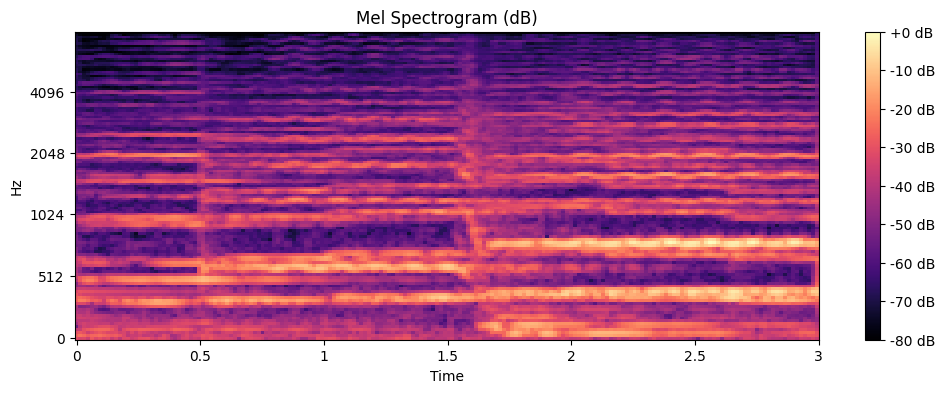

In [ ]:
# Mel Spectrogram
n_mels = 128

mel_spectrogram = librosa.feature.melspectrogram(
    y=audio_16k,
    sr=TARGET_SR,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spectrogram_db, sr=TARGET_SR, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (dB)")
plt.show()

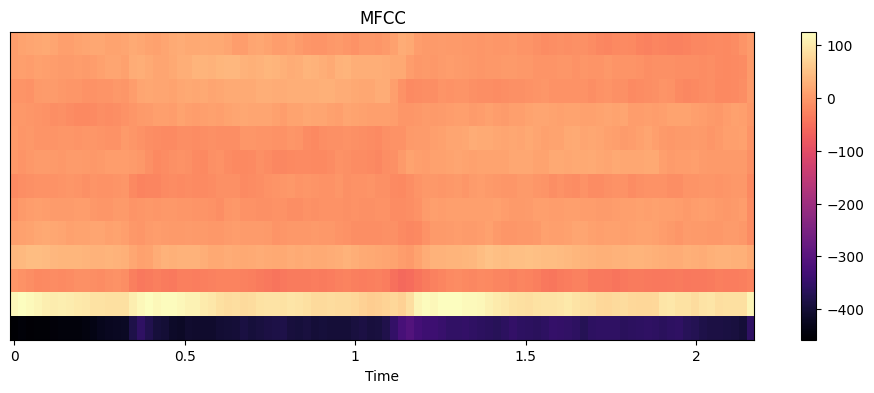

In [ ]:
# MFCC from mel spectrogram
n_mfcc = 13
mfcc = librosa.feature.mfcc(y=audio_16k, sr=TARGET_SR, n_mfcc=n_mfcc)


plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', cmap='magma')
plt.colorbar()
plt.title("MFCC")
plt.show()

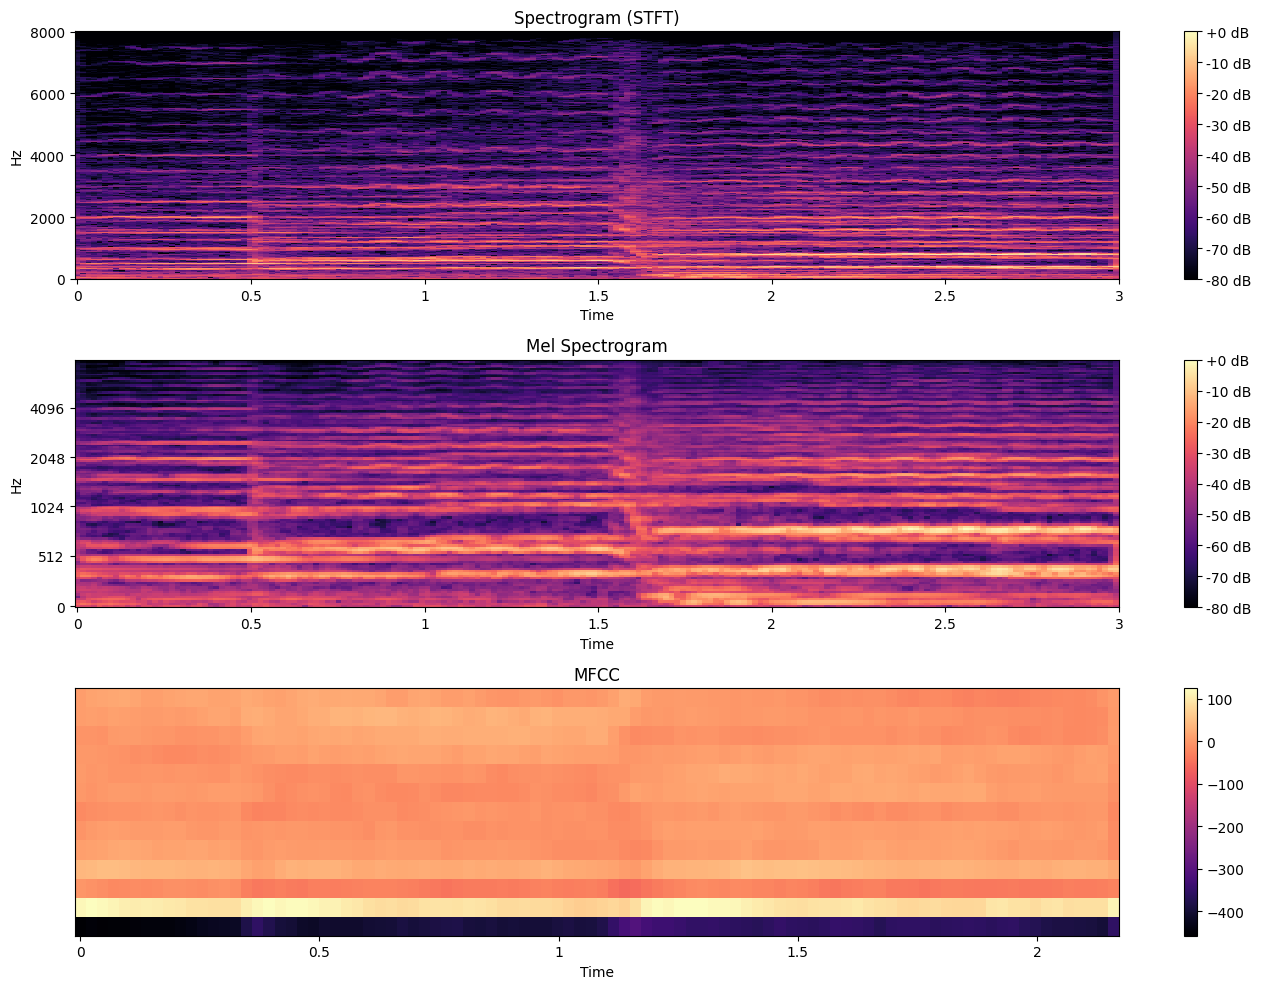

In [ ]:
plt.figure(figsize=(14, 10))

# Spectrogram
plt.subplot(3, 1, 1)
librosa.display.specshow(S_db, sr=TARGET_SR, hop_length=hop_length,
                         x_axis='time', y_axis='linear', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (STFT)")

# Mel Spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(mel_spectrogram_db, sr=TARGET_SR, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")

# MFCC
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc, x_axis='time', cmap='magma')
plt.colorbar()
plt.title("MFCC")

plt.tight_layout()
plt.show()
